In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

Read in th data and separate them into train set and test set.


In [2]:
(train_features, train_targets), (test_features, test_target) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_features.shape)
print(test_features.shape)

(60000, 28, 28)
(10000, 28, 28)


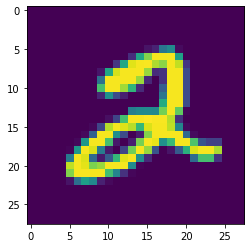

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_features[5, :, :])

Create the neural network. Our feature layer we shall use for extraction will have 12 features.

In [5]:
ff_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(12, activation='relu', name='feature_layer'),
  tf.keras.layers.Dense(10, activation='softmax')
])

ff_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
feature_layer (Dense)        (None, 12)                1548      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
Total params: 102,158
Trainable params: 102,158
Non-trainable params: 0
_________________________________________________________________


Compile and train the data such that the weights will be optimized for feature extraction.

In [6]:
ff_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Training the model for a few epochs so we can have good enough weights for feature extraction
ff_model.fit(train_features, train_targets, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2443 - accuracy: 0.2335
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6895 - accuracy: 0.3381
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4201 - accuracy: 0.4171
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2069 - accuracy: 0.5253
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9787 - accuracy: 0.6406
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7635 - accuracy: 0.7117
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4202 - accuracy: 0.8778
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2221 - accuracy: 0.9491
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1726 - accuracy: 0.9580
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.146

Create the feature extractor that will be built from the weights on the feature layer.

In [53]:
# Create feature extractor from the feature_layer in the feed forward model
feature_extractor = tf.keras.Model(inputs=ff_model.input,
                                       outputs=ff_model.get_layer('feature_layer').output)

feature_extractor.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (InputLayer)   [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
feature_layer (Dense)        (None, 12)                1548      
Total params: 102,028
Trainable params: 102,028
Non-trainable params: 0
_________________________________________________________________


Generate features for first 1000 observations

In [54]:
# Generate features for the first 1000 in train_features.
extracted = feature_extractor(train_features[0:1000])

In [55]:
extracted.numpy().shape

(1000, 12)

Prepare the data for ranking and plotting

In [56]:
feature_names = []
for i in range(1, 13):
  feature_names.append('feature_{}'.format(i))

In [64]:
data = pd.DataFrame(data= extracted.numpy(), columns=feature_names)

There are features that are all zeros which are not useful, removing those.

In [65]:
to_delete = []
for feature in feature_names:
  if len(data[data[feature]>0]) == 0:
    to_delete.append(feature)
to_delete

['feature_3', 'feature_6', 'feature_7', 'feature_11']

In [66]:
data = data.drop(columns=to_delete)

In [67]:
data.shape

(1000, 8)

After removal we are left with 8 features.

In [68]:
data['number'] = train_targets[0:1000]

Inspect the data to see the shape of the data from different numbers.

In [69]:
data[data['number'] == 5]

,feature_1,feature_2,feature_4,feature_5,feature_8,feature_9,feature_10,feature_12,number
0,0.0,0.0,176.473465,314.015076,0.0,0.0,0.0,0.000000,5
11,0.0,0.0,58.009212,232.215607,0.0,0.0,0.0,174.084549,5
35,0.0,0.0,0.000000,302.822693,0.0,0.0,0.0,0.000000,5
47,0.0,0.0,0.000000,339.478119,0.0,0.0,0.0,0.000000,5
65,0.0,0.0,0.000000,324.861328,0.0,0.0,0.0,0.000000,5
...,...,...,...,...,...,...,...,...,...
956,0.0,0.0,89.977417,492.410248,0.0,0.0,0.0,0.000000,5
960,0.0,0.0,0.000000,584.581848,0.0,0.0,0.0,0.000000,5
964,0.0,0.0,7.959805,242.268448,0.0,0.0,0.0,0.000000,5
970,0.0,0.0,97.032753,182.552216,0.0,0.0,0.0,0.000000,5


In [70]:
data[data['number'] == 8]

,feature_1,feature_2,feature_4,feature_5,feature_8,feature_9,feature_10,feature_12,number
17,0.0,156.906403,0.0,126.522758,0.0,0.000000,0.0,0.0,8
31,0.0,163.611649,0.0,80.158943,0.0,0.000000,0.0,0.0,8
41,0.0,139.440506,0.0,135.131653,0.0,0.000000,0.0,0.0,8
46,0.0,95.864059,0.0,89.915115,0.0,0.000000,0.0,0.0,8
55,0.0,135.604919,0.0,107.174278,0.0,0.000000,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...
925,0.0,176.403656,0.0,171.051041,0.0,0.000000,0.0,0.0,8
935,0.0,57.068905,0.0,70.840439,0.0,0.000000,0.0,0.0,8
963,0.0,145.680359,0.0,105.239120,0.0,0.000000,0.0,0.0,8
972,0.0,144.355179,0.0,125.436966,0.0,0.000000,0.0,0.0,8


Use Fisher's Linear Discriminant Ration for ranking.

In [71]:
def calculate_fdr(data, classes):
  fdr = 0
  for i in classes:
    for j in classes:
      if(j == i):
        continue
      mu_i = data[data['number'] == i].drop(columns = ['number']).values.mean()
      mu_j = data[data['number'] == j].drop(columns = ['number']).values.mean()
      sigma_i = data[data['number'] == i].drop(columns = ['number']).values.std()
      sigma_j = data[data['number'] == j].drop(columns = ['number']).values.std()
      denominator = (sigma_i**2 + sigma_j**2)
      if denominator == 0:
        denominator = 1
      fdr = fdr + (((mu_i - mu_j)**2)/denominator)
    
  return fdr

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ranked_feature = {}

for feature in data.columns:
  if feature == 'number':
    continue
  ranked_feature[feature] = calculate_fdr(data.loc[:,[feature, 'number']], classes)
ranked_feature = sorted(ranked_feature.items(), key=lambda item: item[1], reverse=True)

In [72]:
ranked_feature

[('feature_9', 354.8190598462668),
 ('feature_2', 352.96694017989694),
 ('feature_10', 300.4590316798174),
 ('feature_5', 285.1322828808898),
 ('feature_4', 154.8031056767572),
 ('feature_8', 3.6728318145420507),
 ('feature_1', 1.9141151264031915),
 ('feature_12', 1.4349559893632577)]

After ranking the top two features are feature_9 and feature_2.
Next we will plot these two features to see how they classify the data.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


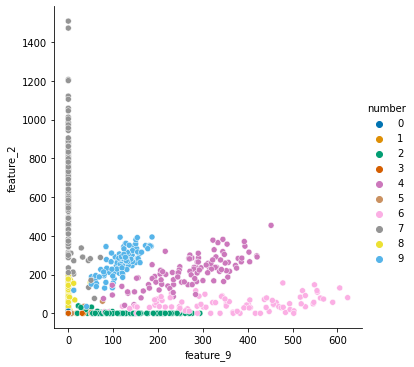

In [49]:
sns.relplot('feature_9', 'feature_2', data = data, hue='number', palette='colorblind')

We can see that feature_9 and feature_2 do a good job in separating the data.